In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/Advait0801/SPPU-COMP-2019-Assignments/refs/heads/ML/Uber%20Price%20Prediction/uber.csv')
ds

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
ds = ds.drop(['Unnamed: 0', 'pickup_datetime'], axis = 1)
ds.dropna(inplace=True)
ds

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00.00000053,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,2014-03-14 01:09:00.0000008,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,2009-06-29 00:42:00.00000078,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,2015-05-20 14:56:25.0000004,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
ds["key"] = pd.to_datetime(ds["key"]).dt.strftime("%H").astype('float32')
ds = ds.rename(columns={"key": "time"})
ds

,time,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,19.0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,20.0,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,21.0,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,8.0,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,17.0,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,10.0,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,1.0,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,0.0,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.0,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
import math

def euclidean_distance(lat1, lon1, lat2, lon2):
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    distance = math.sqrt(dlat**2 + dlon**2)
    return distance

ds['distance'] = ds.apply(
    lambda row: euclidean_distance(
        row['pickup_latitude'],
        row['pickup_longitude'],
        row['dropoff_latitude'],
        row['dropoff_longitude']
    ), axis=1
)

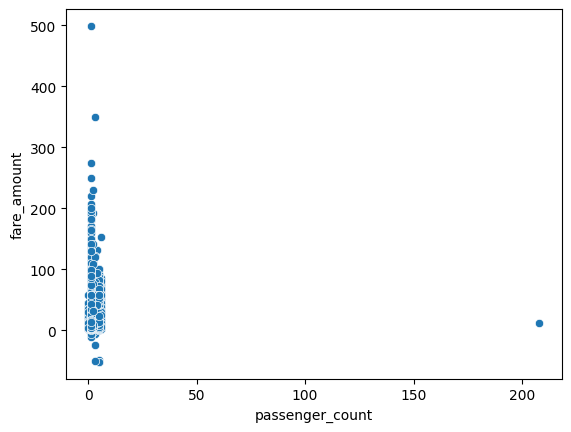

In [6]:
sns.scatterplot(ds, y="fare_amount", x="passenger_count")
ds = ds[ds["passenger_count"] < 100]

In [7]:
def remove_outliers(feature):
    global ds
    q3 , q1 = np.percentile( ds[feature] , [ 75 , 25 ] )
    iqr = q3 - q1
    ds = ds[ (ds[feature] >= q1 - 1.5 * iqr) & (ds[feature] <= q3 + 1.5 * iqr) ]

remove_outliers("pickup_latitude")
remove_outliers("pickup_longitude")
remove_outliers("dropoff_latitude")
remove_outliers("dropoff_longitude")

<Axes: >

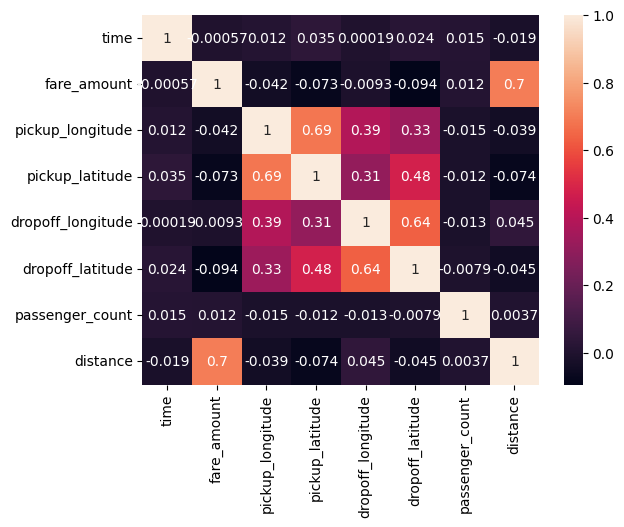

In [8]:
corr = ds.corr(method="pearson")
sns.heatmap(corr, annot=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = ds.drop(['fare_amount'], axis=1)
y = ds['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred

array([ 8.52324621, 19.10671179,  9.05226342, ...,  6.78175806,
        7.04928746,  5.7690897 ])

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 -> ", R2)

RMSE ->  3.3117630216159206
R2 ->  0.5280774655910482


In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred

array([10.62 , 16.331,  7.68 , ...,  5.869,  7.147,  6.024])

In [14]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 -> ", R2)

RMSE ->  3.3011940491378846
R2 ->  0.5310847927797653
